In [6]:
import numpy as np
import math
from multiprocessing import Process, Manager

def add_meow(path):
    return path.append("meow")

def split_chunk(path, num_agents):
    chunck_size = math.ceil(len(path)/num_agents)
    print(f'Chunck size: {chunck_size}')
    for i in range(0, num_agents):    
        yield path[i*chunck_size:(i+1)*chunck_size]
        
path = [[[0, 0], [1, 1], [2, 2]], [[3, 3], [4, 4], [2, 2]], [[6, 6], [4, 4], [8, 8]], [[5, 5], [9, 9]], [[6, 6], [7, 7], [8, 8]]]
num_agents = 3
path_agents = list(split_chunk(path, num_agents))
print(path_agents)

Chunck size: 2
[[[[0, 0], [1, 1], [2, 2]], [[3, 3], [4, 4], [2, 2]]], [[[6, 6], [4, 4], [8, 8]], [[5, 5], [9, 9]]], [[[6, 6], [7, 7], [8, 8]]]]


In [7]:
path[1:]

[[[3, 3], [4, 4], [2, 2]],
 [[6, 6], [4, 4], [8, 8]],
 [[5, 5], [9, 9]],
 [[6, 6], [7, 7], [8, 8]]]

In [53]:
print(len(path))
print(len(path_agents))

5
3


In [54]:
for i in path_agents:
    print(i)

[[[0, 0], [1, 1], [2, 2]], [[3, 3], [4, 4], [2, 2]]]
[[[6, 6], [4, 4], [8, 8]], [[5, 5], [9, 9]]]
[[[6, 6], [7, 7], [8, 8]]]


In [4]:
def reorder(path_set):
    grab_time = 2
    drop_time = 2
    move_time = 1
    path = []
    ## Initial time starts from 0
    time_total = 0
    for moves in path_set:
        for s, site in enumerate(moves):
            move_length = len(moves)
            ## grab
            if s == 0:
                time_total += grab_time
                path.append([site, time_total, 'g'])
            ## drop
            elif s == move_length - 1:
                time_total += drop_time
                path.append([site, time_total, 'd'])
            else:
                time_total += move_time
                path.append([site, time_total, 'm'])

    return path

path_total = list(map(reorder, path_agents))


In [5]:
for p, path in enumerate(path_total):
    print(f'Agent {p}: {path}')


Agent 0: [[[0, 0], 2, 'g'], [[1, 1], 3, 'm'], [[2, 2], 5, 'd'], [[5, 5], 7, 'g'], [[9, 9], 9, 'd']]
Agent 1: [[[3, 3], 2, 'g'], [[4, 4], 3, 'm'], [[2, 2], 5, 'd'], [[6, 6], 7, 'g'], [[7, 7], 8, 'm'], [[8, 8], 10, 'd']]
Agent 2: [[[6, 6], 2, 'g'], [[4, 4], 3, 'm'], [[8, 8], 5, 'd'], [[9, 9], 7, 'g'], [[5, 5], 9, 'd']]


In [6]:
wait_time = 0.5
agent_path = path_total

for a, ap in enumerate(agent_path):
        print(f'agent {a}: {ap}\n')
print('\n')   

agen_num = len(agent_path)
for n in range(agen_num - 1):
    for main_site in agent_path[n]:
        #print(f'{main_site}')
        ## Can be parallelize for each (path_total[n:])
        for m in range(n + 1, agen_num):
            for s, site in enumerate(agent_path[m]):
                #print(f'site:{site}')
                if main_site[:2] == site[:2]:
                    agent_path[m].insert(s + 1, [site[0], site[1] + wait_time,'w'])
                    ## Add wait time to all the following moves
                    for i in range(s+2, len(agent_path[n+1])):
                        agent_path[m][i][1] += wait_time

for a, ap in enumerate(agent_path):
        print(f'agent {a}: {ap}\n')

agent 0: [[[0, 0], 2, 'g'], [[1, 1], 3, 'm'], [[2, 2], 5, 'd'], [[5, 5], 7, 'g'], [[9, 9], 9, 'd']]

agent 1: [[[3, 3], 2, 'g'], [[4, 4], 3, 'm'], [[2, 2], 5, 'd'], [[6, 6], 7, 'g'], [[7, 7], 8, 'm'], [[8, 8], 10, 'd']]

agent 2: [[[6, 6], 2, 'g'], [[4, 4], 3, 'm'], [[8, 8], 5, 'd'], [[9, 9], 7, 'g'], [[5, 5], 9, 'd']]



agent 0: [[[0, 0], 2, 'g'], [[1, 1], 3, 'm'], [[2, 2], 5, 'd'], [[5, 5], 7, 'g'], [[9, 9], 9, 'd']]

agent 1: [[[3, 3], 2, 'g'], [[4, 4], 3, 'm'], [[2, 2], 5, 'd'], [[2, 2], 5.5, 'w'], [[6, 6], 7.5, 'g'], [[7, 7], 8.5, 'm'], [[8, 8], 10.5, 'd']]

agent 2: [[[6, 6], 2, 'g'], [[4, 4], 3, 'm'], [[4, 4], 3.5, 'w'], [[8, 8], 5.5, 'd'], [[9, 9], 7.5, 'g'], [[5, 5], 9.5, 'd']]



Multi-processing, keep developing after single loop version complete.

In [ ]:
def compare(agent_path, n, main_site):
        wait_time = 0.5
        for s, site in enumerate(agent_path[n+1]):
            if main_site[:2] == site[:2]:
                agent_path[n+1].insert(s + 1, [site[0], site[1] + wait_time,'w'])
                ## Add wait time to all the following moves
                for i in range(s+2, len(agent_path[n+1])):
                    agent_path[n+1][i][1] += wait_time

with Manager() as manager:
    agent_path = manager.list(path_total)  # <-- can be shared between processes.
    
    for a, ap in enumerate(agent_path):
        print(f'agent {a}: {ap}')

    agen_num = len(agent_path)
    for n in range(agen_num - 1):
        for main_site in agent_path[n]:
            ## Can be parallelize for each (path_total[n:])
            processes = []
            for i in range(n, agen_num - 1):
                p = Process(target=compare, args=(agent_path, n, main_site))  # Passing the list
                p.start()
                processes.append(p)

            for p in processes:
                p.join()

In [24]:
a = [[80., 76.],
 [78., 78.],
 [78., 80.],
 [76., 76.],
 [82., 82.],
 [82., 76.],
 [80., 80.],
 [82., 78.]]
print(a[:, 0])

TypeError: list indices must be integers or slices, not tuple

In [4]:
move = [[76.0, 77.2]]
print(np.asarray(move)[:, 0])

[76.]


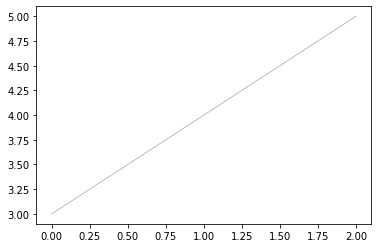

In [8]:
import matplotlib.pyplot as plt
plt.plot(np.asarray(move)[:, 0], np.asarray(move)[:, 1], color='black', linewidth=0.5, alpha=0.5)

In [5]:
a = [(0, 0), (1, 1)]
b = [(2, 2), (3, 3)]
print(a+b)

[(0, 0), (1, 1), (2, 2), (3, 3)]


In [19]:
a = np.asarray([[78, 78], [78, 80], [80, 78], [80, 80]])
b = np.asarray([76, 78])

if b.tolist() in a.tolist():
    print(f'True')
else:
    print(f'False')

False
